## INTRODUCTION

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

I am going to use this dataset to predict house prices. Also,I want to know where is the most expensive area and I sort out zip code by grade and density, so a person can easily find out a place whether they like high graded and crowded area or not. Then, I want to find out which factors are more effective to price, so I used the correlation heatmap, and we can know the relation of any feature. After I selected top 5 important features to predict house price. Finally, I did linear regression and ligistic regression models.

The contents of this notebook are as follows:

1.Load Dataset and clean data : This section will revolve around exploring the data.

2.Data Analysis:visualising some summary statistics and see each feature related to price

3.Feature Selection:Use Heat map to see the correlation between features 

4.Regression:Implementing 2 of Sklearn's linear models (Linear Regression, Logistic Regression) and counts Mean absolute error, Mean squared error, Median squared error and R².

5.Conclusion



## Requirements modules

In [1]:
import pandas as pd   
import numpy as np    
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
import random
import matplotlib.pyplot as plt  
import os
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn import linear_model

## Load Dataset and clean data:

In [2]:
try:
    f = open('/Users/eva/Desktop/UCSC/python programmers/final project/data/kc_house_data.csv','r')
    print('file is found')
    
except IOError:
    print("File not found.")

file is found


In [3]:
def load_kc_house(path):
    data = pd.read_csv(path)
    data['date'] = pd.to_datetime(data['date']).apply(lambda x: x.date())
    return data

In [4]:
data = load_kc_house('/Users/eva/Desktop/UCSC/python programmers/final project/data/kc_house_data.csv')

In [5]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
data['year'] = pd.to_datetime(data['date']).apply(lambda x: x.year)
data['month'] = pd.to_datetime(data['date']).apply(lambda x: x.month)
data['day'] = pd.to_datetime(data['date']).apply(lambda x: x.day)

seperate date into year,month and day

In [8]:
#drop date
df=data.drop('date',axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
id               21613 non-null int64
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
year             21613 non-null int64
month            21613 non-null int64
day              21613 non-null int64
dtypes:

Let's see if there are any nulls in the dataframe as well as look at the type of the data (i.e whether it is a string or numeric)

In [10]:
df.shape

(21613, 23)

In [11]:
# Find total missing values
print('Missing values:\n{}'.format(df.isnull().sum()))

Missing values:
id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year             0
month            0
day              0
dtype: int64


## Data Analysis

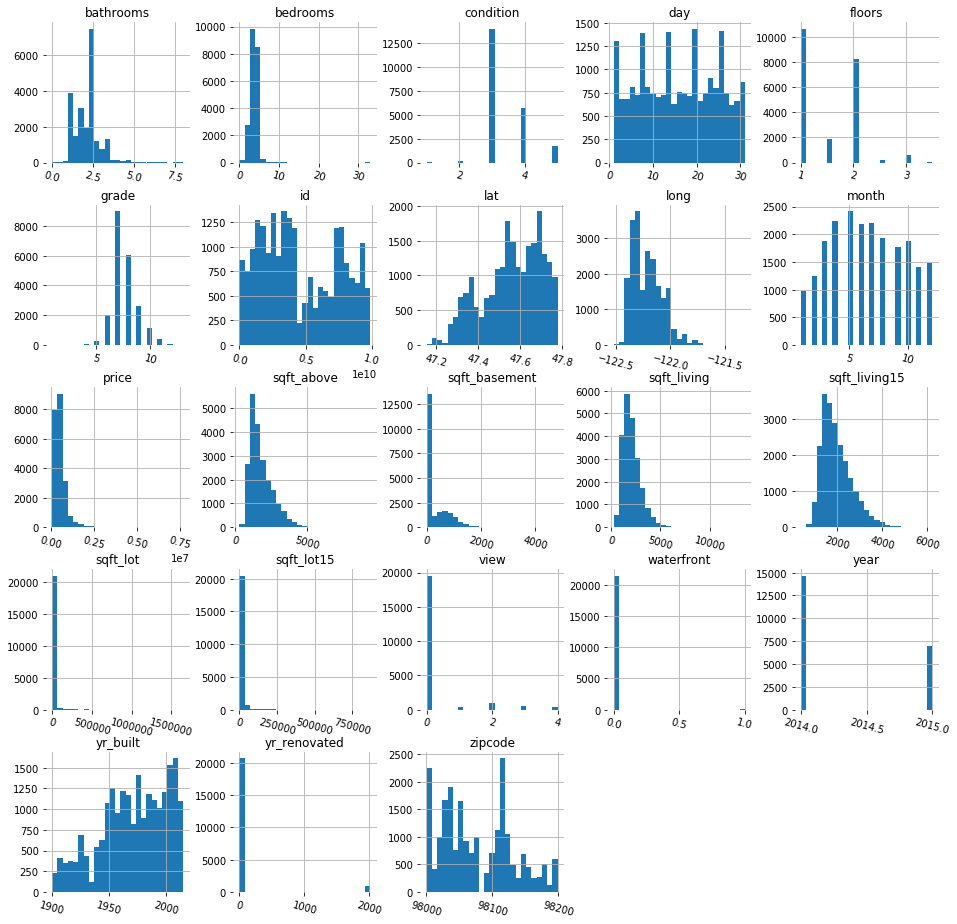

In [12]:
h = df.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

Let's see each feature related to price

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-p

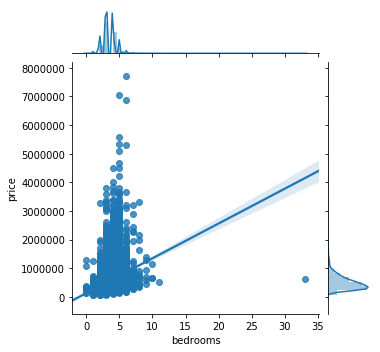

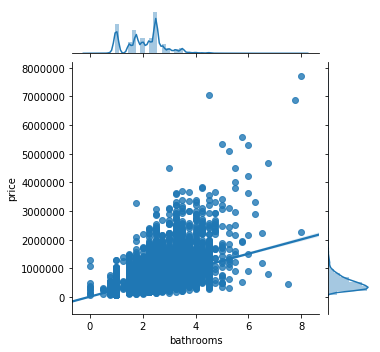

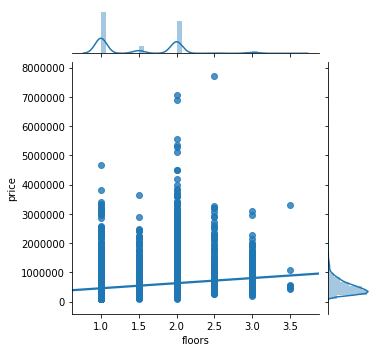

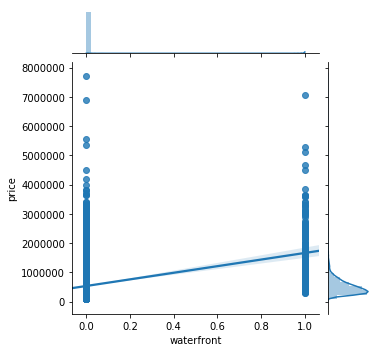

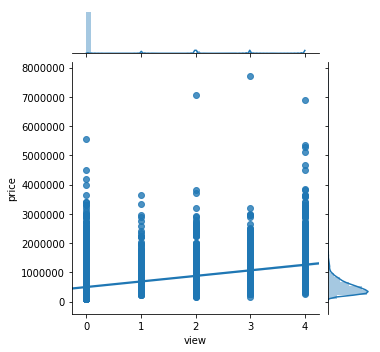

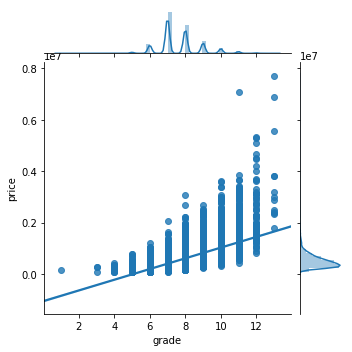

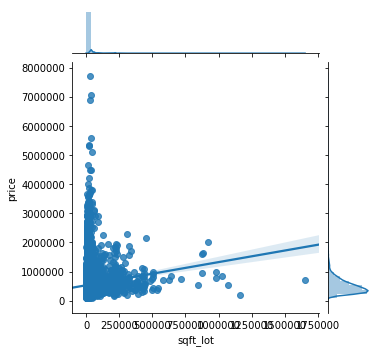

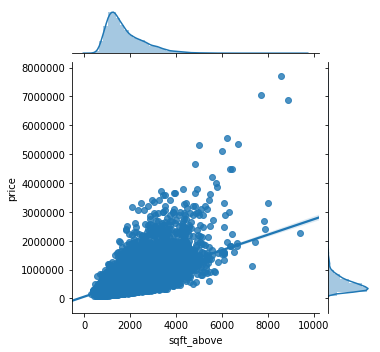

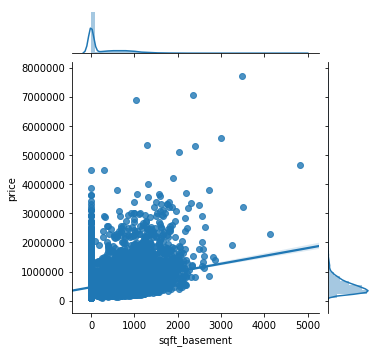

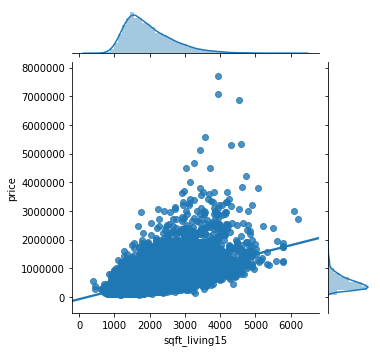

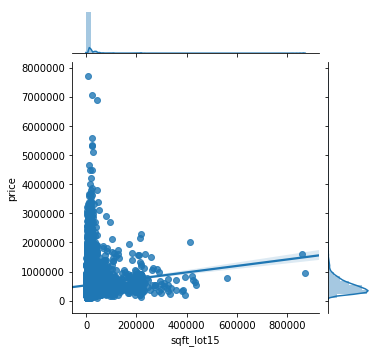

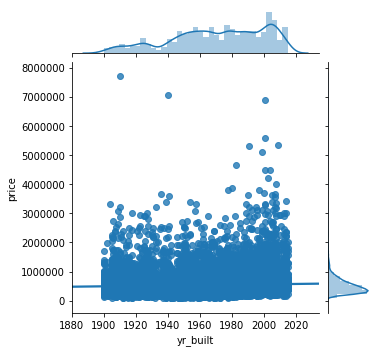

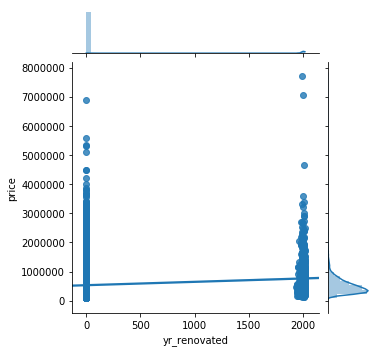

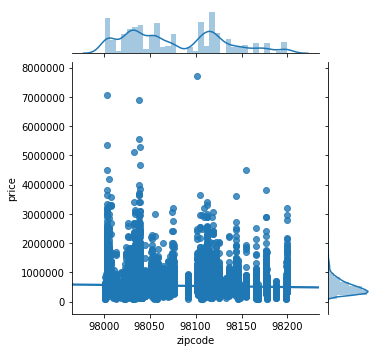

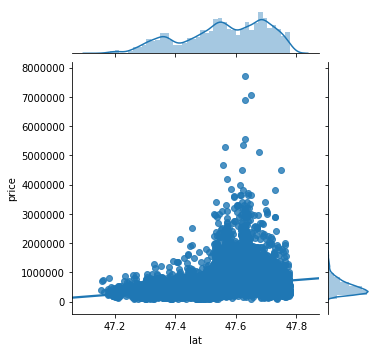

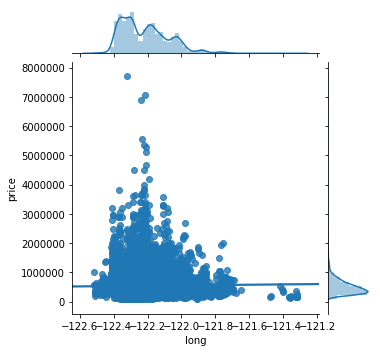

In [13]:
sns.jointplot(x="bedrooms", y="price", data=df, kind = 'reg', size = 5)
sns.jointplot(x="bathrooms", y="price", data=df, kind = 'reg', size = 5)
sns.jointplot(x="floors", y="price", data=df, kind = 'reg', size = 5)
sns.jointplot(x="waterfront", y="price", data=df, kind = 'reg', size = 5)
sns.jointplot(x="view", y="price", data=df, kind = 'reg', size = 5)
sns.jointplot(x="grade", y="price", data=df, kind = 'reg', size = 5)
sns.jointplot(x="sqft_lot", y="price", data=df, kind = 'reg', size = 5)
sns.jointplot(x="sqft_above", y="price", data=df, kind = 'reg', size = 5)
sns.jointplot(x="sqft_basement", y="price", data=df, kind = 'reg', size = 5)
sns.jointplot(x="sqft_living15", y="price", data=df, kind = 'reg', size = 5)
sns.jointplot(x="sqft_lot15", y="price", data=df, kind = 'reg', size = 5)
sns.jointplot(x="yr_built", y="price", data=df, kind = 'reg', size = 5)
sns.jointplot(x="yr_renovated", y="price", data=df, kind = 'reg', size = 5)
sns.jointplot(x="zipcode", y="price", data=df, kind = 'reg', size = 5)
sns.jointplot(x="lat", y="price", data=df, kind = 'reg', size = 5)
sns.jointplot(x="long", y="price", data=df, kind = 'reg', size = 5)
plt.show()

#### location

In this dataset, we have latitude and longtitude information for the houses. By using lat and long columns, we can find out which area is more expensive. Also, I think the zipcode column gives similar information about the location.

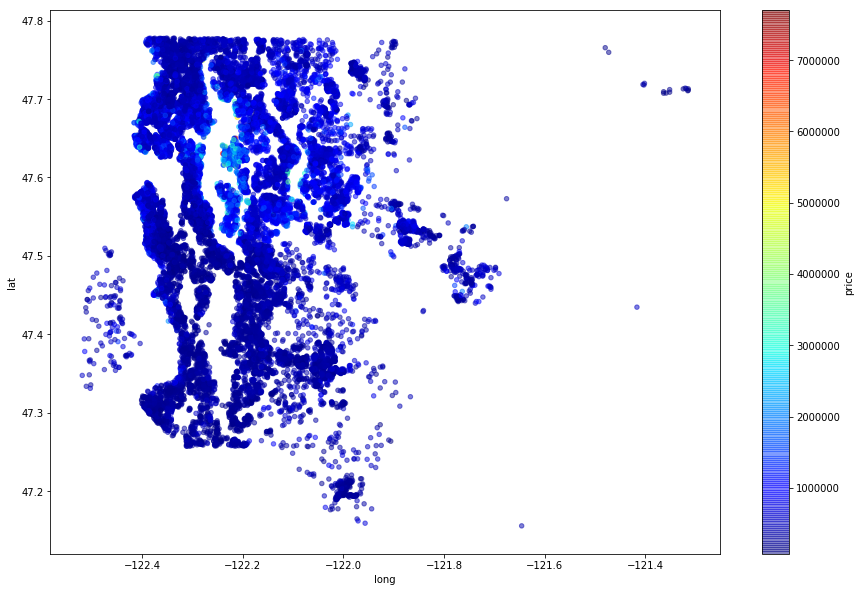

In [14]:
# The most expensive area is North West part of KIngs County.

data.plot(kind="scatter", x="long", y="lat", alpha=0.5, figsize=(15,10), c="price", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.savefig('coloredByPrice.png')

In [15]:
#import re

count1 = 0
count2 = 0

zipcode_check = re.compile(r'(9\d)')

for i in df['zipcode']:
    
    if zipcode_check.search(str(i)):
        count1 += 1
    else:
        count2 += 1
        
print('The number of valid zipcode is %d' %count1)
print("The number of invalid zipcode is %d " %count2)
        

The number of valid zipcode is 21613
The number of invalid zipcode is 0 


In [16]:
len(data['zipcode'].value_counts())

70

In [17]:
#Zipcode grouped by price

dens = df.groupby('zipcode').count()['grade']
mean = df.groupby('zipcode').mean()['grade']
group = pd.concat([dens, mean], axis=1)
group['zipcode'] = group.index
group.columns = ['density', 'grade','zipcode']
group.describe()

,density,grade,zipcode
count,70.000000,70.000000,70.000000
mean,308.757143,7.664549,98077.300000
std,142.267296,0.611821,56.622408
min,50.000000,6.509294,98001.000000
25%,204.500000,7.261202,98029.250000
50%,282.500000,7.536861,98067.500000
75%,409.000000,8.016916,98117.750000
max,602.000000,9.560000,98199.000000


In [18]:
#Find out values by each group

group1 = group[group.grade < 7.536861]
group1.index

Int64Index([98001, 98002, 98010, 98014, 98019, 98022, 98024, 98030, 98031,
            98032, 98034, 98042, 98055, 98056, 98070, 98103, 98106, 98107,
            98108, 98115, 98117, 98118, 98125, 98126, 98133, 98136, 98144,
            98146, 98148, 98155, 98166, 98168, 98178, 98188, 98198],
           dtype='int64', name='zipcode')

In [19]:
temp= group[group.grade >= 7.536861]
group2 = temp[temp.density <282.500000]
group2.index

Int64Index([98003, 98005, 98007, 98011, 98039, 98040, 98045, 98072, 98077,
            98102, 98105, 98109, 98112, 98119, 98177],
           dtype='int64', name='zipcode')

In [20]:
group3 = temp[temp.density >=282.500000]
group3.index

Int64Index([98004, 98006, 98008, 98023, 98027, 98028, 98029, 98033, 98038,
            98052, 98053, 98058, 98059, 98065, 98074, 98075, 98092, 98116,
            98122, 98199],
           dtype='int64', name='zipcode')

In [21]:
#Make a function. if you put a zip code, you can get one of three groups.

def find_group(x):
    if x in group1.index:
        return 'low grade area'
    elif x in group2.index:
        return 'high grade and low density area'
    else:
        return 'high grade and high density area'
    
df['group'] = data.zipcode.apply(find_group)

In [22]:
df['group'].value_counts()

low grade area                      10719
high grade and high density area     7935
high grade and low density area      2959
Name: group, dtype: int64

In [23]:
df.groupby(['group']).mean()['price']

group
high grade and high density area    614054.369502
high grade and low density area     758809.295708
low grade area                      424954.462170
Name: price, dtype: float64

As we see, high grade and low density area is more expensive than others and low grade area is cheaper.

In [24]:
le = preprocessing.LabelEncoder()
df['group']=le.fit_transform(df['group'])

In [25]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,group
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,98178,47.5112,-122.257,1340,5650,2014,10,13,2
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1991,98125,47.7210,-122.319,1690,7639,2014,12,9,2
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,98028,47.7379,-122.233,2720,8062,2015,2,25,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,0,98136,47.5208,-122.393,1360,5000,2014,12,9,2
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,98074,47.6168,-122.045,1800,7503,2015,2,18,0


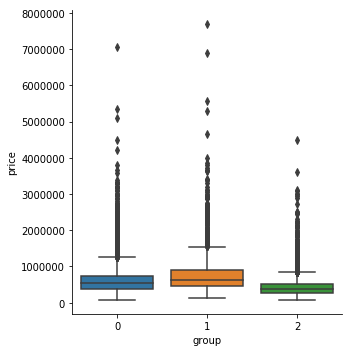

In [26]:
sns.catplot(x="group", y="price", kind="box", data=df)

group '0' means 'high grade and high density area'    
group '1' means 'high grade and low density area'     
group '2' means 'low grade area'                      

#### Bathroom and Bedroom

Using boxplot to determine bedrooms, floors or bathrooms/bedrooms vs price.

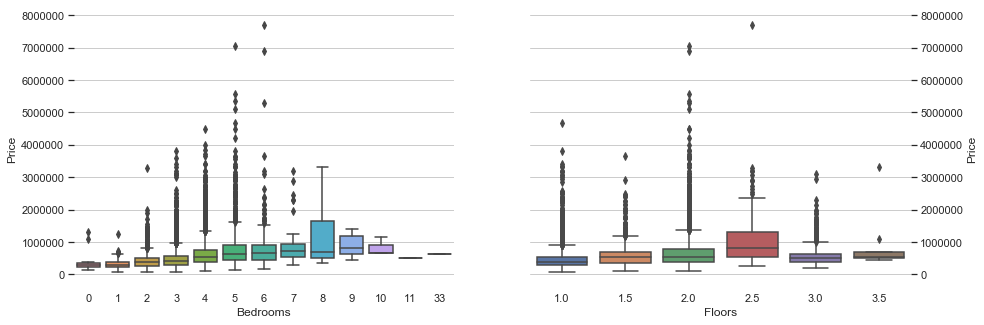

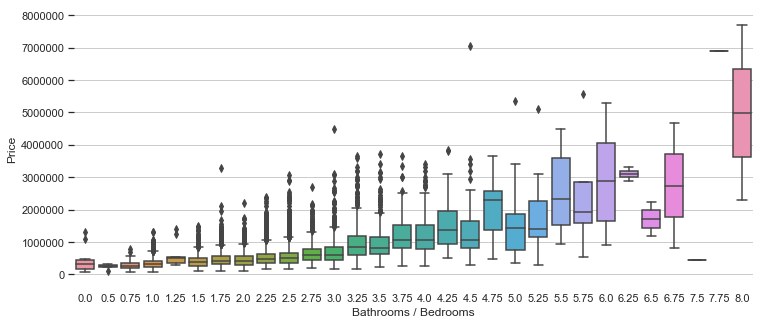

In [27]:
sns.set(style="whitegrid", font_scale=1)

f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['bedrooms'],y=df['price'], ax=axes[0])
sns.boxplot(x=df['floors'],y=df['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Bedrooms', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Floors', ylabel='Price')

f, axe = plt.subplots(1, 1,figsize=(12.18,5))
sns.despine(left=True, bottom=True)
sns.boxplot(x=df['bathrooms'],y=df['price'], ax=axe)
axe.yaxis.tick_left()
axe.set(xlabel='Bathrooms / Bedrooms', ylabel='Price');

## Feature Selection

Let's look at the correlation heatmap, and we can know the relation of any feature

In [28]:
#split the data into x and y
y = df.loc[:, 'price']
X = df.drop("price",axis=1)

Show correlation through heat map 

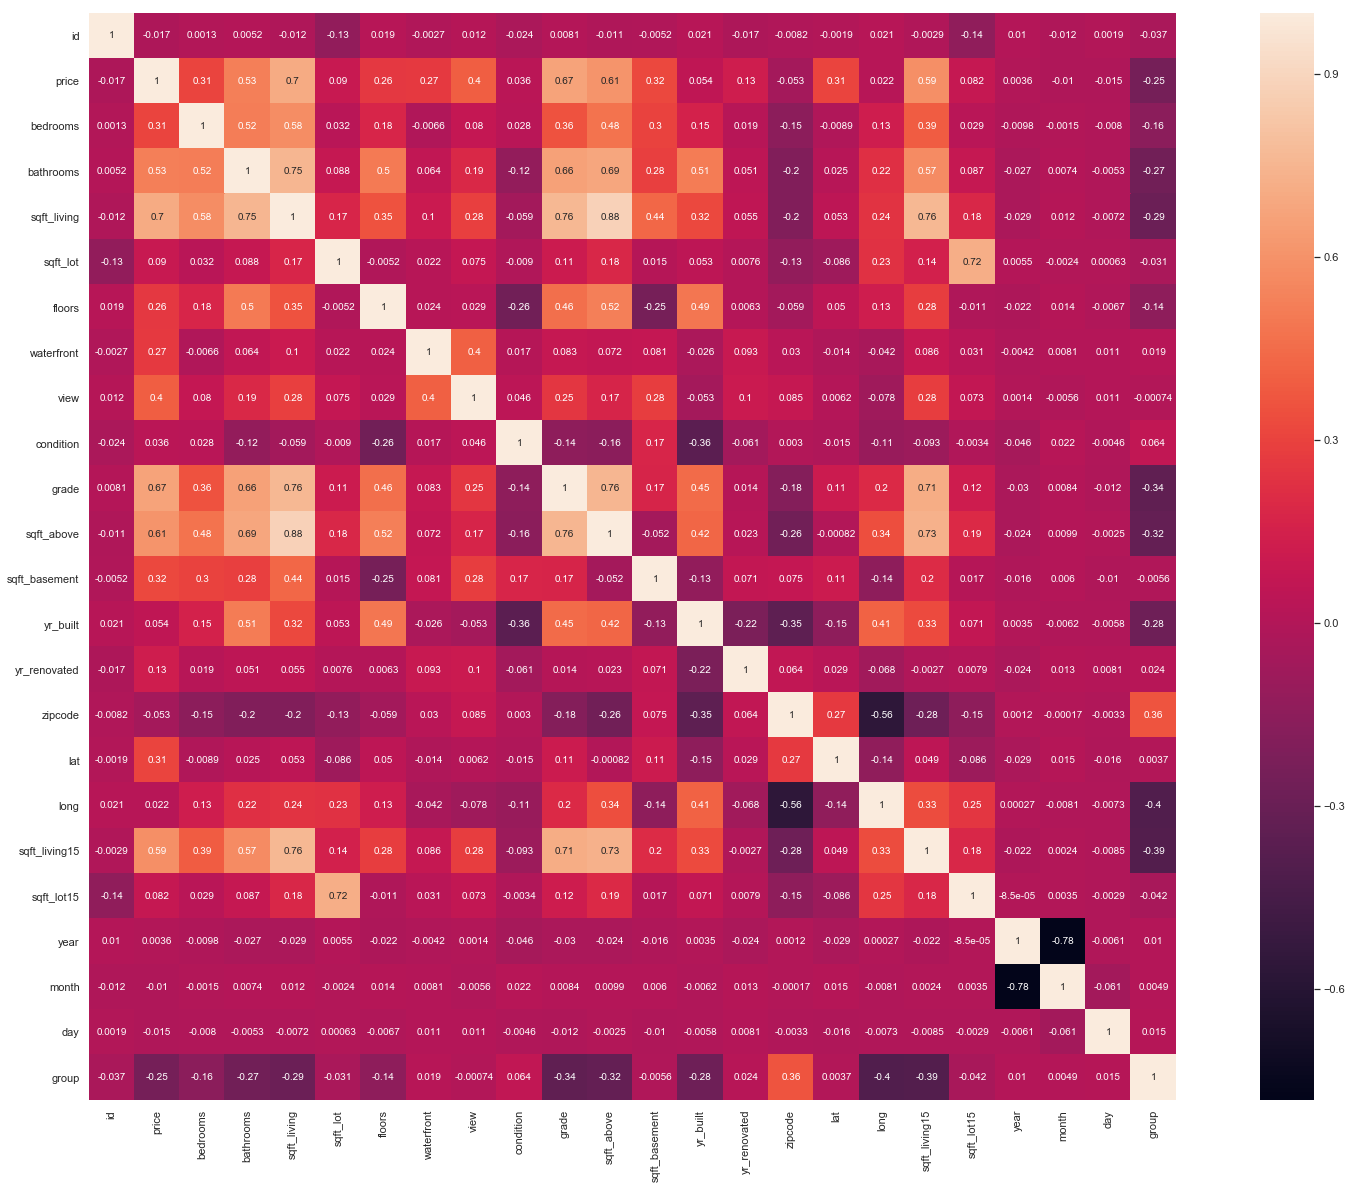

In [29]:
# Drawing the correlation figure
fig = plt.subplots(figsize = (30,20))
# sns.set(font_scale = 1.5)
sns.heatmap (df.corr(), square = True, cbar = True, annot = True, annot_kws = {'size': 10})
plt.show()

Table of price with correlation of each feature  

In [30]:
corr_price =pd.DataFrame(df.corrwith(y))
corr_price.columns =["Correlation with price"]
corr_price.sort_values(by = "Correlation with price", ascending = False)


,Correlation with price
price,1.000000
sqft_living,0.702035
grade,0.667434
sqft_above,0.605567
sqft_living15,0.585379
bathrooms,0.525138
view,0.397293
sqft_basement,0.323816
bedrooms,0.308350
lat,0.307003


select features of 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms' to predict 'price'

## Data Scaling and Splitting

Select important features as x and price for y

In [31]:
y = df.loc[:, 'price']
X = df.loc[:, ['sqft_living', 'grade', 'sqft_above', 'sqft_living15','bathrooms' ]]

80% training data and 20% testing data

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Regression

 Apply regression and plot its results

 #### Evaluation regression function

In [34]:
'''Explained variance score'''
'''The best possible score is 1.0, lower values are worse.'''
from sklearn.metrics import explained_variance_score
# print(explained_variance_score(y_test, y_pred))
'''Mean absolute error'''
from sklearn.metrics import mean_absolute_error
# print(mean_absolute_error(y_test, y_pred))
'''Mean squared error'''
from sklearn.metrics import mean_squared_error
# print(mean_squared_error(y_test, y_pred))
'''Mean squared logarithmic error'''
from sklearn.metrics import mean_squared_log_error
# print(mean_squared_log_error(y_test, y_pred))
'''Median absolute error'''
from sklearn.metrics import median_absolute_error
# print(median_absolute_error(y_test, y_pred))
'''R² score, the coefficient of determination'''
'''Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).'''
from sklearn.metrics import r2_score
# print(r2_score(y_test, y_pred))
score_array =[]
R_square_array = []
model_name = []
model_R_name = []


def evaluate_regression(y_test, y_pred):
    output = "Explained variance score: {}\n".format(explained_variance_score(y_test, y_pred))
    output += "Mean absolute error: {}\n".format(mean_absolute_error(y_test, y_pred))
    output += "Mean squared error: {}\n".format(mean_squared_error(y_test, y_pred))
    # output += "Mean squared logarithmic error: {}\n".format(mean_squared_log_error(y_test, y_pred))
    output += "Median squared error: {}\n".format(median_absolute_error(y_test, y_pred))
    R_square_array.append(r2_score(y_test, y_pred))
    output += "R² score: {}\n".format(r2_score(y_test, y_pred))
    return output

In [35]:
def plotting(y_test, y_pred, title, r_square):
    # Plot the results
    plt.figure()
    plt.scatter(y_test, y_pred, c='r')
    plt.scatter(y_test, y_test)
    plt.xlabel("data")
    plt.ylabel("target")
    plt.legend(('predicted', 'actual'), loc='lower right')
    plt.title("{} -> R²: {}".format(title, round(r_square, 2)))
    plt.show()

Regression Function

In [36]:
def fit_data(regressor):
    print('================{}=================='.format(str(regressor.__class__.__name__)))
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    print(evaluate_regression(y_test, y_pred))
    model_R_name.append(str(regressor.__class__.__name__))
    plotting(y_test, y_pred, str(regressor.__class__.__name__), r2_score(y_test, y_pred))
    print('================{}=================='.format(str(regressor.__class__.__name__)))

#### Apply regression and plot its results

================LinearRegression==================
Explained variance score: 0.5499814334445083
Mean absolute error: 157273.16727674336
Mean squared error: 53627203996.72304
Median squared error: 119336.10456328315
R² score: 0.5490642548077924



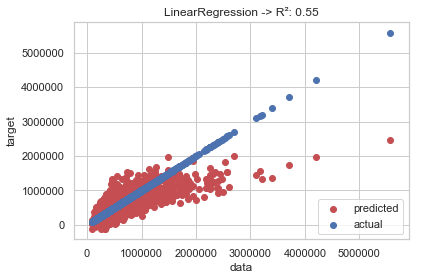

================LinearRegression==================
================LogisticRegression==================
Explained variance score: 0.4054436123702674
Mean absolute error: 166892.33795975018
Mean squared error: 75596205567.51169
Median squared error: 115000.0
R² score: 0.36433323480052693



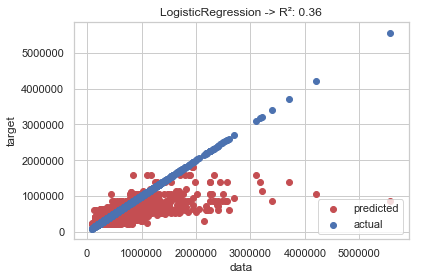

================LogisticRegression==================


In [37]:
from sklearn import linear_model
regressor_list = [linear_model.LinearRegression(),
                  linear_model.LogisticRegression()]
for regressor in regressor_list:
    fit_data(regressor)

##  Conclusion

First of all, I used features of latitude and longitude according price to draw a scatter plot. The result shows that The North West part is most expensive area.

Secondly, I sorted out zipcode by grade and density, then divided 3 sections which are 'low grade', 'high grade & high density', and 'high grade & low density'. And we can see each mean of price, we can find out 'high grade and low density area' is more expensive than others and 'low grade area' is cheaper.

Third, I want to find out which factors are more effective to price, so I used the correlation heatmap, and we can know the relation of any feature. After that I selected features of 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms' to predict 'price'.

Finally, I used LinearRegression and LogisticRegression models to prediction. Then, compared to these two regression models, linearRegression is better than logisticRegression.

The result of Linear Regression: 
Explained variance score: 0.5499814334445083
Mean absolute error: 157273.16727674336
Mean squared error: 53627203996.72304
Median squared error: 119336.10456328315
R² score: 0.5490642548077924

The result of Logistic Regression: 
Explained variance score: 0.4054436123702674
Mean absolute error: 166892.33795975018
Mean squared error: 75596205567.51169
Median squared error: 115000.0
R² score: 0.36433323480052693